# Hands-on Activity 4.2 - Object Detection on Custom Dataset

Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 313
Code Title: | Advanced Machine Learning and Deep Learning
2nd Semester | AY 2023-2024
--- | ---
<u>**ACTIVITY NO. 4.2** | **Hands-on Activity 4.2 Object Detection on Custom Dataset**
**Name** | Mendoza, Paulo
--- | ---
**Section** | CPE32S8
**Date Performed**: | April 1, 2024
**Date Submitted**: | April 1, 2024
**Instructor**: | Engr. Roman M. Richard


# Procedure

## **Training YOLOv3 object detection on a custom dataset**

💡 Recommendation: [Open this blog post](https://blog.roboflow.ai/training-a-yolov3-object-detection-model-with-a-custom-dataset/) to continue.

### **Overview**

This notebook walks through how to train a YOLOv3 object detection model on your own dataset using Roboflow and Colab.

In this specific example, we'll training an object detection model to recognize chess pieces in images. **To adapt this example to your own dataset, you only need to change one line of code in this notebook.**

![Chess Example](https://i.imgur.com/nkjobw1.png)

### **Our Data**

Our dataset of 289 chess images (and 2894 annotations!) is hosted publicly on Roboflow [here](https://public.roboflow.ai/object-detection/chess-full).

### **Our Model**

We'll be training a YOLOv3 (You Only Look Once) model. This specific model is a one-shot learner, meaning each image only passes through the network once to make a prediction, which allows the architecture to be very performant, viewing up to 60 frames per second in predicting against video feeds.

The GitHub repo containing the majority of the code we'll use is available [here](https://github.com/roboflow-ai/keras-yolo3.git).

### **Training**

Google Colab provides free GPU resources. Click "Runtime" → "Change runtime type" → Hardware Accelerator dropdown to "GPU."

Colab does have memory limitations, and notebooks must be open in your browser to run. Sessions automatically clear themselves after 24 hours.

### **Inference**

We'll leverage the `python_video.py` script to produce predictions. Arguments are specified below.

It's recommended that you expand the left-hand panel to view this notebook's Table of contents, Code Snippets, and Files.

![Expand Colab](https://i.imgur.com/r8kWzIv.png "Click here")

Then, click "Files." You'll see files appear here as we work through the notebook.


### **About**

[Roboflow](https://roboflow.ai) makes managing, preprocessing, augmenting, and versioning datasets for computer vision seamless.

Developers reduce 50% of their boilerplate code when using Roboflow's workflow, save training time, and increase model reproducibility.

#### ![Roboflow Workmark](https://i.imgur.com/WHFqYSJ.png)







## Setup our environment

First, we'll install the version of Keras our YOLOv3 implementation calls for and verify it installs corrects.

*sir I have also tried YOLOv3 but I found out about YOLOv8 which is a better version so in this notebook I used YOLOv8 but the YOLOv3 implementation can be found here: https://colab.research.google.com/drive/1pdozsVqWLsKytNm5ygpB-kTg2QjLHxRy?usp=sharing*

In [1]:
# Get our kernel running
print("Hello, Roboflow")

Hello, Roboflow


In [2]:
# install torch 1st before ultralytics or uninstall torch torchvision torchaudio then install this torch
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
import torch
print(torch.cuda.device_count())
print(torch.cuda.is_available())

Looking in indexes: https://download.pytorch.org/whl/cu121
1
True


In [3]:
!pip install ultralytics

In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
import torch
print(torch.__version__) 

2.2.2+cu121


In [6]:
import os
HOME = os.getcwd()
print(HOME)

d:\datasci\projectFiles\hoa_4_2


## Get our training data from Roboflow

Next, we need to add our data from Roboflow into our environment.

Our dataset, with annotations, is [here](https://public.roboflow.ai/object-detection/chess-full).

Here's how to bring those images from Roboflow to Colab:

1. Visit this [link](https://public.roboflow.ai/object-detection/chess-full).
2. Click the "416x416auto-orient" under Downloads.
3. On the dataset detail page, select "Download" in the upper right-hand corner.
4. If you are not signed in, you will be prompted to create a free account (sign in with GitHub or email), and redirected to the dataset page to Download.
5. On the download popup, select the YOLOv3 Keras option **and** the "Show download `code`".
6. Copy the code snippet Roboflow generates for you, and paste it in the next cell.

This is the download menu you want (from step 5):
#### ![Download Menu](https://i.imgur.com/KW2PyQO.png)

The top code snippet is the one you want to copy (from step 6) and paste in the next notebook cell:
### ![Code Snippet](https://i.imgur.com/qzJckWR.png)





**This cell below is only one you need to change to have YOLOv3 train on your own Roboflow dataset.**

In [7]:
!pip install roboflow

In [8]:
# Specify the new directory name
new_folder_name = "datasets"

# Combine the home directory and new folder name
new_folder_path = os.path.join(HOME, new_folder_name)

# Create the new folder
try:
    os.mkdir(new_folder_path)

except Exception as e:
    # Catch more general exceptions
    print(f"An exception occurred: {e}")

An exception occurred: [WinError 183] Cannot create a file when that file already exists: 'd:\\datasci\\projectFiles\\hoa_4_2\\datasets'


In [10]:
%cd {HOME}/datasets

d:\datasci\projectFiles\hoa_4_2\datasets


*I have chosen this dataset: https://universe.roboflow.com/amol-wankhade/fruitclass.*

*the . in the end of the link is also part of the url*

In [11]:
from roboflow import Roboflow
rf = Roboflow(api_key="F9m2TdCpJmeMP1XVGhOF")
project = rf.workspace("amol-wankhade").project("fruitclass.")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.45, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to fruitclass.-1 in yolov8:: 100%|██████████| 860/860 [00:00<00:00, 3801.83it/s]


## Set up and train our model

Next, we'll download pre-trained weighs weights from DarkNet, set up our YOLOv3 architecture with those pre-trained weights, and initiate training.


In [12]:
%cd {HOME}

d:\datasci\projectFiles\hoa_4_2


In [13]:
model = YOLO('yolov8n.yaml').load('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 22.9MB/s]

Transferred 355/355 items from pretrained weights


In [15]:
results = model.train(data=rf"{dataset.location}/data.yaml", epochs=10, imgsz=640)

Ultralytics YOLOv8.1.45  Python-3.12.2 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=d:\datasci\projectFiles\hoa_4_2\datasets\fruitclass.-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf

train: Scanning D:\datasci\projectFiles\hoa_4_2\datasets\fruitclass.-1\train\labels... 372 images, 0 backgrounds, 0 corrupt: 100%|██████████| 372/372 [00:00<00:00, 415.40it/s]

train: New cache created: D:\datasci\projectFiles\hoa_4_2\datasets\fruitclass.-1\train\labels.cache



val: Scanning D:\datasci\projectFiles\hoa_4_2\datasets\fruitclass.-1\valid\labels... 35 images, 0 backgrounds, 0 corrupt: 100%|██████████| 35/35 [00:00<00:00, 316.54it/s]

val: New cache created: D:\datasci\projectFiles\hoa_4_2\datasets\fruitclass.-1\valid\labels.cache


Plotting labels to runs\detect\train2\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train2
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.14G      1.231      4.168      2.081          4        640: 100%|██████████| 24/24 [00:06<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.50it/s]

                   all         35         35     0.0034      0.985      0.398      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.15G     0.7789      2.878      1.516          4        640: 100%|██████████| 24/24 [00:04<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.02it/s]

                   all         35         35      0.876      0.222      0.457        0.2



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.15G     0.7265      2.196      1.468          4        640: 100%|██████████| 24/24 [00:04<00:00,  5.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.37it/s]

                   all         35         35      0.847      0.285      0.746       0.32



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      2.16G     0.7304      1.846      1.446          4        640: 100%|██████████| 24/24 [00:04<00:00,  5.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.15it/s]

                   all         35         35      0.865      0.755      0.872      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      2.15G     0.6098      1.685      1.332          4        640: 100%|██████████| 24/24 [00:04<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.84it/s]

                   all         35         35      0.784      0.915      0.955      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      2.16G     0.5314       1.52      1.243          4        640: 100%|██████████| 24/24 [00:04<00:00,  5.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.56it/s]

                   all         35         35      0.868      0.888      0.987      0.624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      2.15G     0.4646      1.374      1.161          4        640: 100%|██████████| 24/24 [00:04<00:00,  5.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.00it/s]

                   all         35         35      0.895       0.91       0.94      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.15G     0.4408      1.346      1.123          4        640: 100%|██████████| 24/24 [00:04<00:00,  5.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.20it/s]

                   all         35         35      0.967      0.966      0.988      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.15G     0.4303      1.232      1.092          4        640: 100%|██████████| 24/24 [00:04<00:00,  5.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.82it/s]

                   all         35         35      0.941      0.897      0.975       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.16G     0.3755      1.165       1.06          4        640: 100%|██████████| 24/24 [00:04<00:00,  5.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.42it/s]

                   all         35         35      0.954      0.936      0.983      0.633



10 epochs completed in 0.021 hours.
Optimizer stripped from runs\detect\train2\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train2\weights\best.pt, 6.2MB

Validating runs\detect\train2\weights\best.pt...
Ultralytics YOLOv8.1.45  Python-3.12.2 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
YOLOv8n summary (fused): 168 layers, 3006818 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]


                   all         35         35      0.955      0.936      0.982       0.63
                 Guava         35          6      0.976          1      0.995      0.694
                  Lime         35         11      0.982          1      0.995      0.708
                Orange         35          3      0.941          1      0.995      0.664
           Pomegranate         35          6      0.848          1      0.995      0.679
                 apple         35          2       0.98          1      0.995      0.451
                banana         35          7          1      0.616      0.917      0.584
Speed: 0.2ms preprocess, 2.9ms inference, 0.0ms loss, 1.5ms postprocess per image
Results saved to runs\detect\train2


Below, we'll call a "self-contained" Python script that initiates training our model on our custom dataset.

Pay notable attention to:
- setting the paths for our `annotation_path`, `classes_path`, `class_names`. If you move the Roboflow data location, you'll need to update these.
- `val_split` dictates the size of our training data relative to our taining data
- `lr=1e-3` to set the learning rate of the model. Smaller optimizes more slowly but potentially more precisely.
- `batch_size` for the number of images trained per batch
-  `epoch` inside `model.fit_generator()` sets the number training epochs to increase/decrease training examples (and time)

Consider reading the YOLOv3 paper [here](https://pjreddie.com/media/files/papers/YOLOv3.pdf).

In [ ]:
"""
Self-contained Python script to train YOLOv3 on your own dataset
"""

import numpy as np
import keras.backend as K
from keras.layers import Input, Lambda
from keras.models import Model
from keras.optimizers import Adam
from keras.callbacks import TensorBoard, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

from yolo3.model import preprocess_true_boxes, yolo_body, tiny_yolo_body, yolo_loss
from yolo3.utils import get_random_data


def _main():
    annotation_path = '_annotations.txt'  # path to Roboflow data annotations
    log_dir = 'logs/000/'                 # where we're storing our logs
    classes_path = '_classes.txt'         # path to Roboflow class names
    anchors_path = 'model_data/yolo_anchors.txt'
    class_names = get_classes(classes_path)
    print("-------------------CLASS NAMES-------------------")
    print(class_names)
    print("-------------------CLASS NAMES-------------------")
    num_classes = len(class_names)
    anchors = get_anchors(anchors_path)

    input_shape = (416,416) # multiple of 32, hw

    is_tiny_version = len(anchors)==6 # default setting
    if is_tiny_version:
        model = create_tiny_model(input_shape, anchors, num_classes,
            freeze_body=2, weights_path='model_data/tiny_yolo_weights.h5')
    else:
        model = create_model(input_shape, anchors, num_classes,
            freeze_body=2, weights_path='model_data/yolo.h5') # make sure you know what you freeze

    logging = TensorBoard(log_dir=log_dir)
    checkpoint = ModelCheckpoint(log_dir + 'ep{epoch:03d}-loss{loss:.3f}-val_loss{val_loss:.3f}.h5',
        monitor='val_loss', save_weights_only=True, save_best_only=True, period=3)
    reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=3, verbose=1)
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)

    val_split = 0.2 # set the size of the validation set
    with open(annotation_path) as f:
        lines = f.readlines()
    np.random.seed(10101)
    np.random.shuffle(lines)
    np.random.seed(None)
    num_val = int(len(lines)*val_split)
    num_train = len(lines) - num_val

    # Train with frozen layers first, to get a stable loss.
    # Adjust num epochs to your dataset. This step is enough to obtain a not bad model.
    if True:
        model.compile(optimizer=Adam(lr=1e-3), loss={
            # use custom yolo_loss Lambda layer.
            'yolo_loss': lambda y_true, y_pred: y_pred})

        batch_size = 32
        print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
        model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
                steps_per_epoch=max(1, num_train//batch_size),
                validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
                validation_steps=max(1, num_val//batch_size),
                epochs=500,
                initial_epoch=0,
                callbacks=[logging, checkpoint])
        model.save_weights(log_dir + 'trained_weights_stage_1.h5')

    # Unfreeze and continue training, to fine-tune.
    # Train longer if the result is not good.
    if True:
        for i in range(len(model.layers)):
            model.layers[i].trainable = True
        model.compile(optimizer=Adam(lr=1e-4), loss={'yolo_loss': lambda y_true, y_pred: y_pred}) # recompile to apply the change
        print('Unfreeze all of the layers.')

        batch_size = 32 # note that more GPU memory is required after unfreezing the body
        print('Train on {} samples, val on {} samples, with batch size {}.'.format(num_train, num_val, batch_size))
        model.fit_generator(data_generator_wrapper(lines[:num_train], batch_size, input_shape, anchors, num_classes),
            steps_per_epoch=max(1, num_train//batch_size),
            validation_data=data_generator_wrapper(lines[num_train:], batch_size, input_shape, anchors, num_classes),
            validation_steps=max(1, num_val//batch_size),
            epochs=100,
            initial_epoch=50,
            callbacks=[logging, checkpoint, reduce_lr, early_stopping])
        model.save_weights(log_dir + 'trained_weights_final.h5')

    # Further training if needed.


def get_classes(classes_path):
    '''loads the classes'''
    with open(classes_path) as f:
        class_names = f.readlines()
    class_names = [c.strip() for c in class_names]
    return class_names

def get_anchors(anchors_path):
    '''loads the anchors from a file'''
    with open(anchors_path) as f:
        anchors = f.readline()
    anchors = [float(x) for x in anchors.split(',')]
    return np.array(anchors).reshape(-1, 2)


def create_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
            weights_path='model_data/yolo.h5'):
    '''create the training model'''
    K.clear_session() # get a new session
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16, 2:8}[l], w//{0:32, 1:16, 2:8}[l], \
        num_anchors//3, num_classes+5)) for l in range(3)]

    model_body = yolo_body(image_input, num_anchors//3, num_classes, )
    print('Create YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True, skip_mismatch=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze darknet53 body or freeze all but 3 output layers.
            num = (185, len(model_body.layers)-3)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    model_loss = Lambda(yolo_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.5})(
        [*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model

def create_tiny_model(input_shape, anchors, num_classes, load_pretrained=True, freeze_body=2,
            weights_path='model_data/tiny_yolo_weights.h5'):
    '''create the training model, for Tiny YOLOv3'''
    K.clear_session() # get a new session
    image_input = Input(shape=(None, None, 3))
    h, w = input_shape
    num_anchors = len(anchors)

    y_true = [Input(shape=(h//{0:32, 1:16}[l], w//{0:32, 1:16}[l], \
        num_anchors//2, num_classes+5)) for l in range(2)]

    model_body = tiny_yolo_body(image_input, num_anchors//2, num_classes, skip_mismatch=True)
    print('Create Tiny YOLOv3 model with {} anchors and {} classes.'.format(num_anchors, num_classes))

    if load_pretrained:
        model_body.load_weights(weights_path, by_name=True)
        print('Load weights {}.'.format(weights_path))
        if freeze_body in [1, 2]:
            # Freeze the darknet body or freeze all but 2 output layers.
            num = (20, len(model_body.layers)-2)[freeze_body-1]
            for i in range(num): model_body.layers[i].trainable = False
            print('Freeze the first {} layers of total {} layers.'.format(num, len(model_body.layers)))

    model_loss = Lambda(yolo_loss, output_shape=(1,), name='yolo_loss',
        arguments={'anchors': anchors, 'num_classes': num_classes, 'ignore_thresh': 0.7})(
        [*model_body.output, *y_true])
    model = Model([model_body.input, *y_true], model_loss)

    return model

def data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes):
    '''data generator for fit_generator'''
    n = len(annotation_lines)
    i = 0
    while True:
        image_data = []
        box_data = []
        for b in range(batch_size):
            if i==0:
                np.random.shuffle(annotation_lines)
            image, box = get_random_data(annotation_lines[i], input_shape, random=True)
            image_data.append(image)
            box_data.append(box)
            i = (i+1) % n
        image_data = np.array(image_data)
        box_data = np.array(box_data)
        y_true = preprocess_true_boxes(box_data, input_shape, anchors, num_classes)
        yield [image_data, *y_true], np.zeros(batch_size)

def data_generator_wrapper(annotation_lines, batch_size, input_shape, anchors, num_classes):
    n = len(annotation_lines)
    if n==0 or batch_size<=0: return None
    return data_generator(annotation_lines, batch_size, input_shape, anchors, num_classes)

if __name__ == '__main__':
    _main()

## Use our model for inference

For predictions, we'll call a a Python script called `yolo_video.py` with required arguments for our use case: a path to our specific first stage trained weights (see our blog for why we're using only stage one), a path to our custom class names, and a flag to specify we're using images.

Additional arguments for `yolo_video.py` are as follows:

```
usage: yolo_video.py [-h] [--model MODEL] [--anchors ANCHORS]
                     [--classes CLASSES] [--gpu_num GPU_NUM] [--image]
                     [--input] [--output]

positional arguments:
  --input        Video input path
  --output       Video output path

optional arguments:
  -h, --help         show this help message and exit
  --model MODEL      path to model weight file, default model_data/yolo.h5
  --anchors ANCHORS  path to anchor definitions, default
                     model_data/yolo_anchors.txt
  --classes CLASSES  path to class definitions, default
                     model_data/coco_classes.txt
  --gpu_num GPU_NUM  Number of GPU to use, default 1
  --image            Image detection mode, will ignore all positional arguments
```

*I have added metrics*

d:\datasci\projectFiles\hoa_4_2


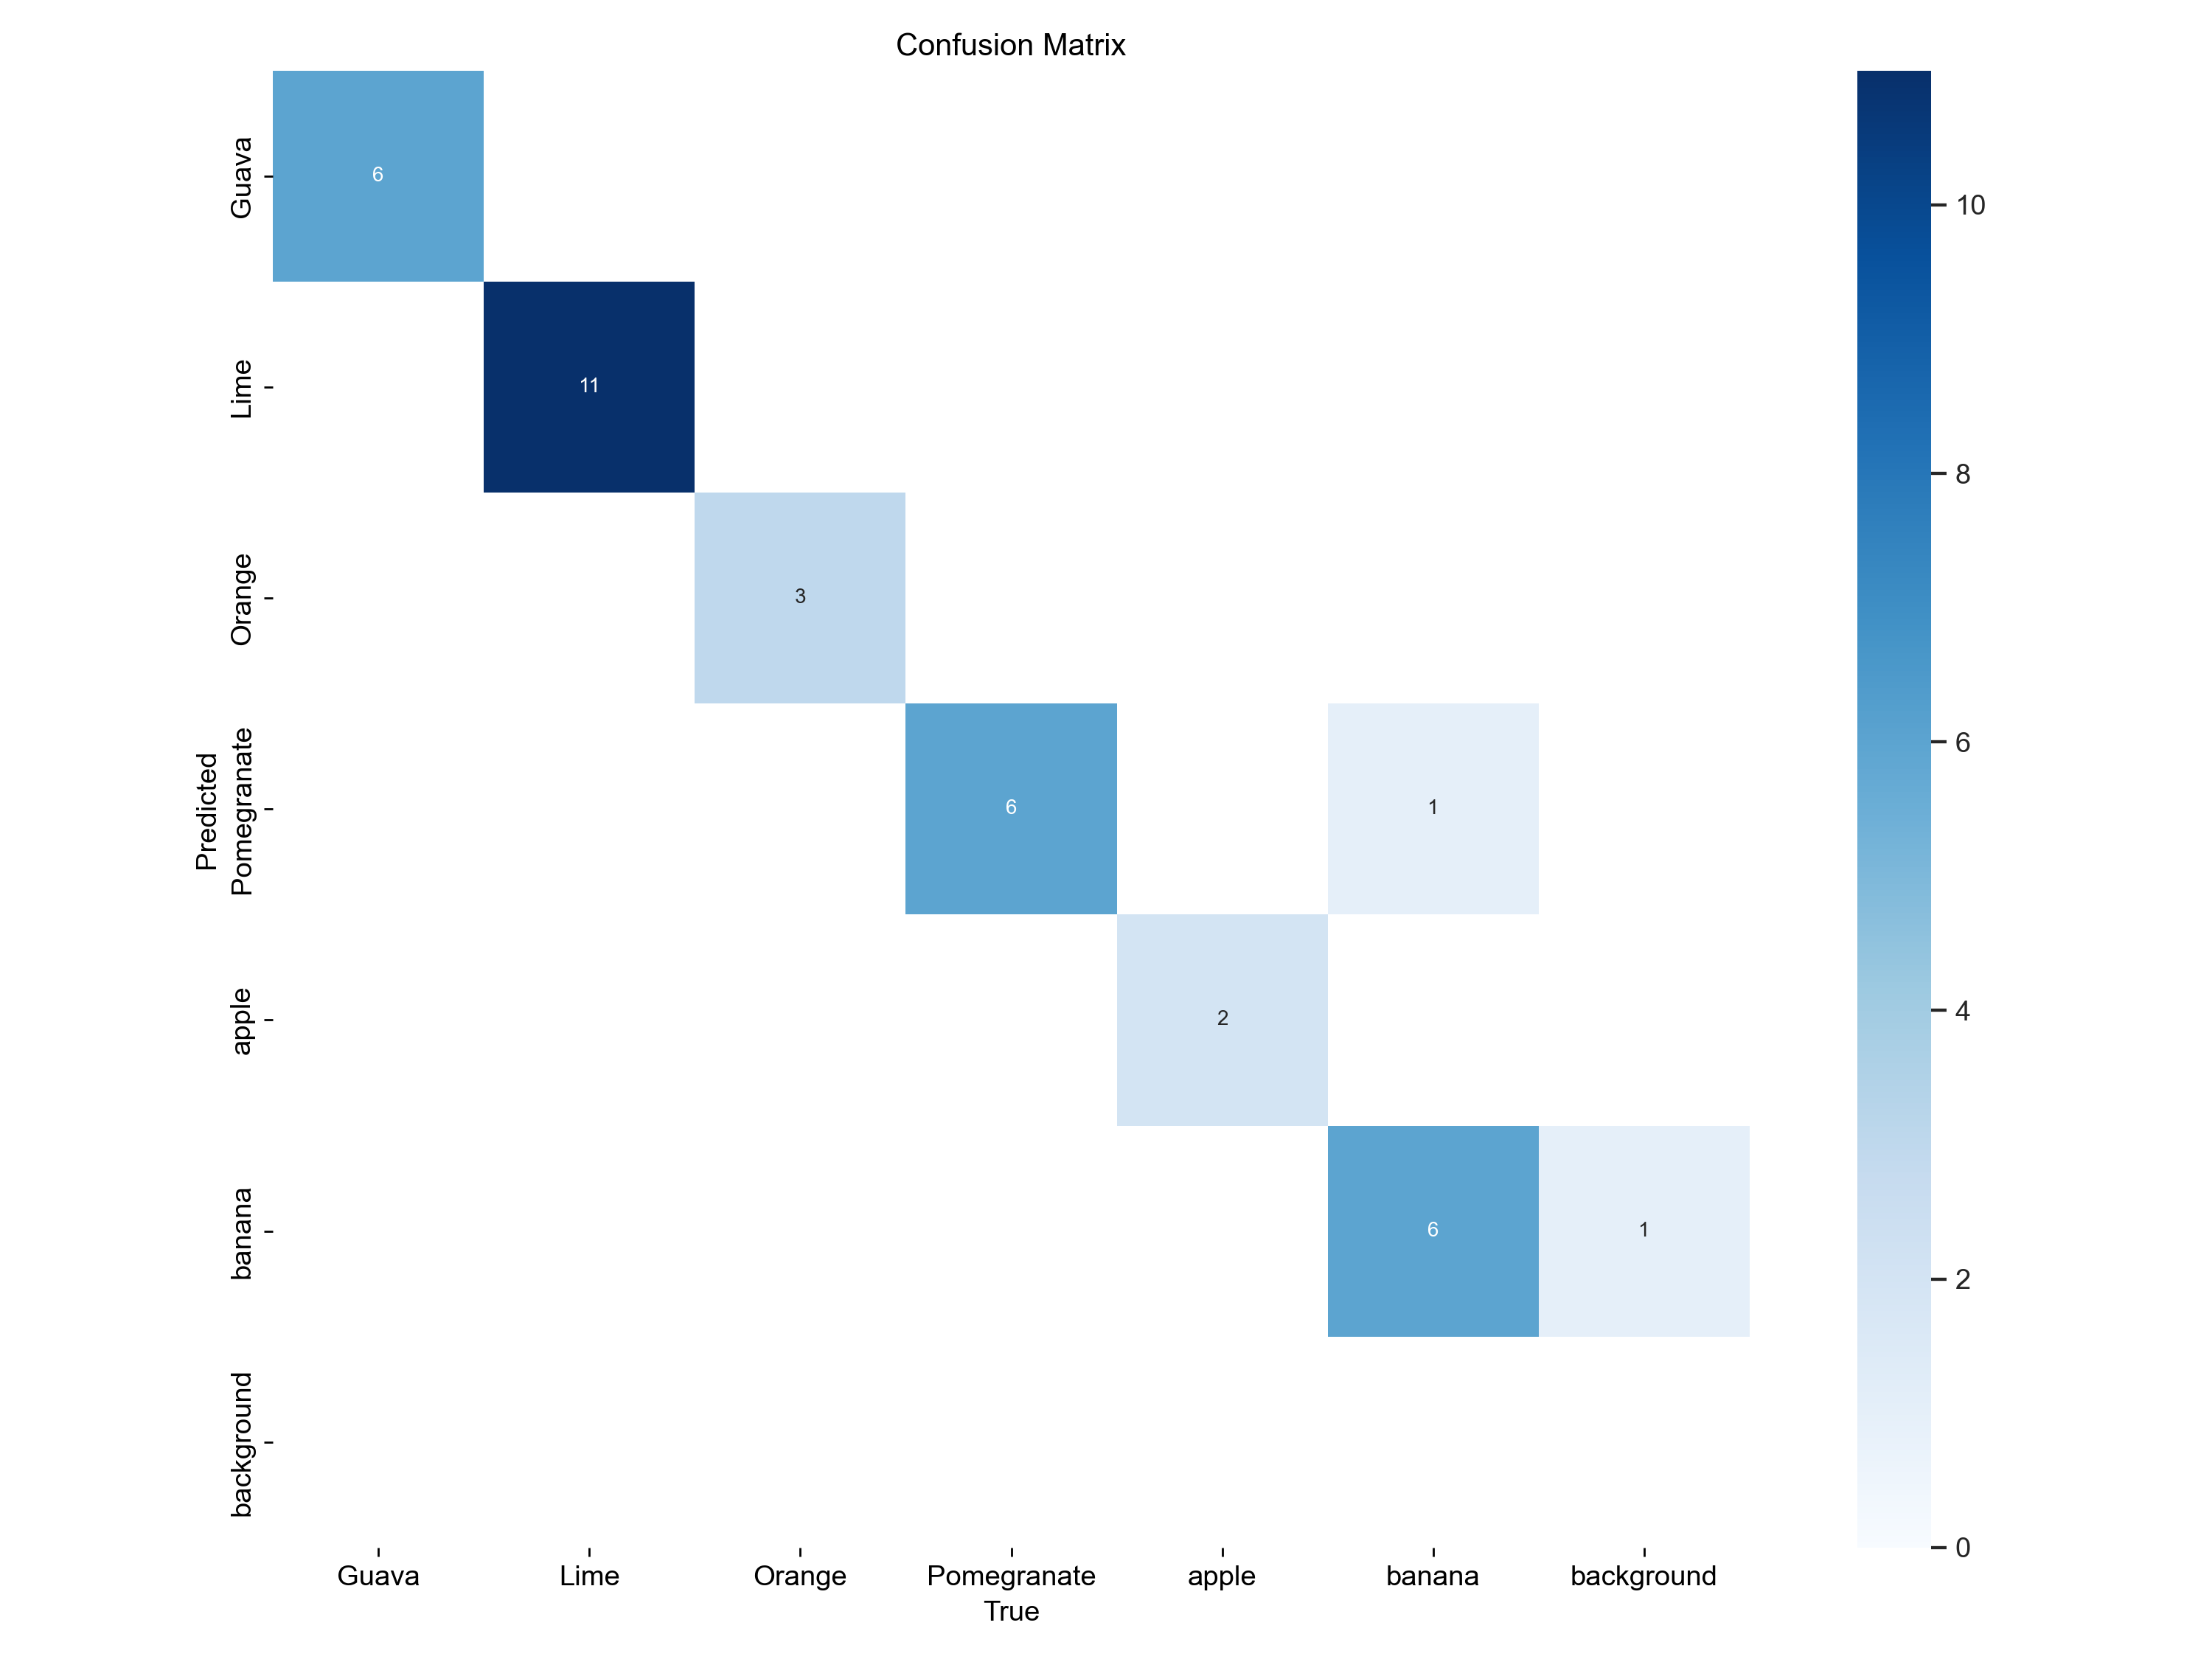

In [17]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

d:\datasci\projectFiles\hoa_4_2


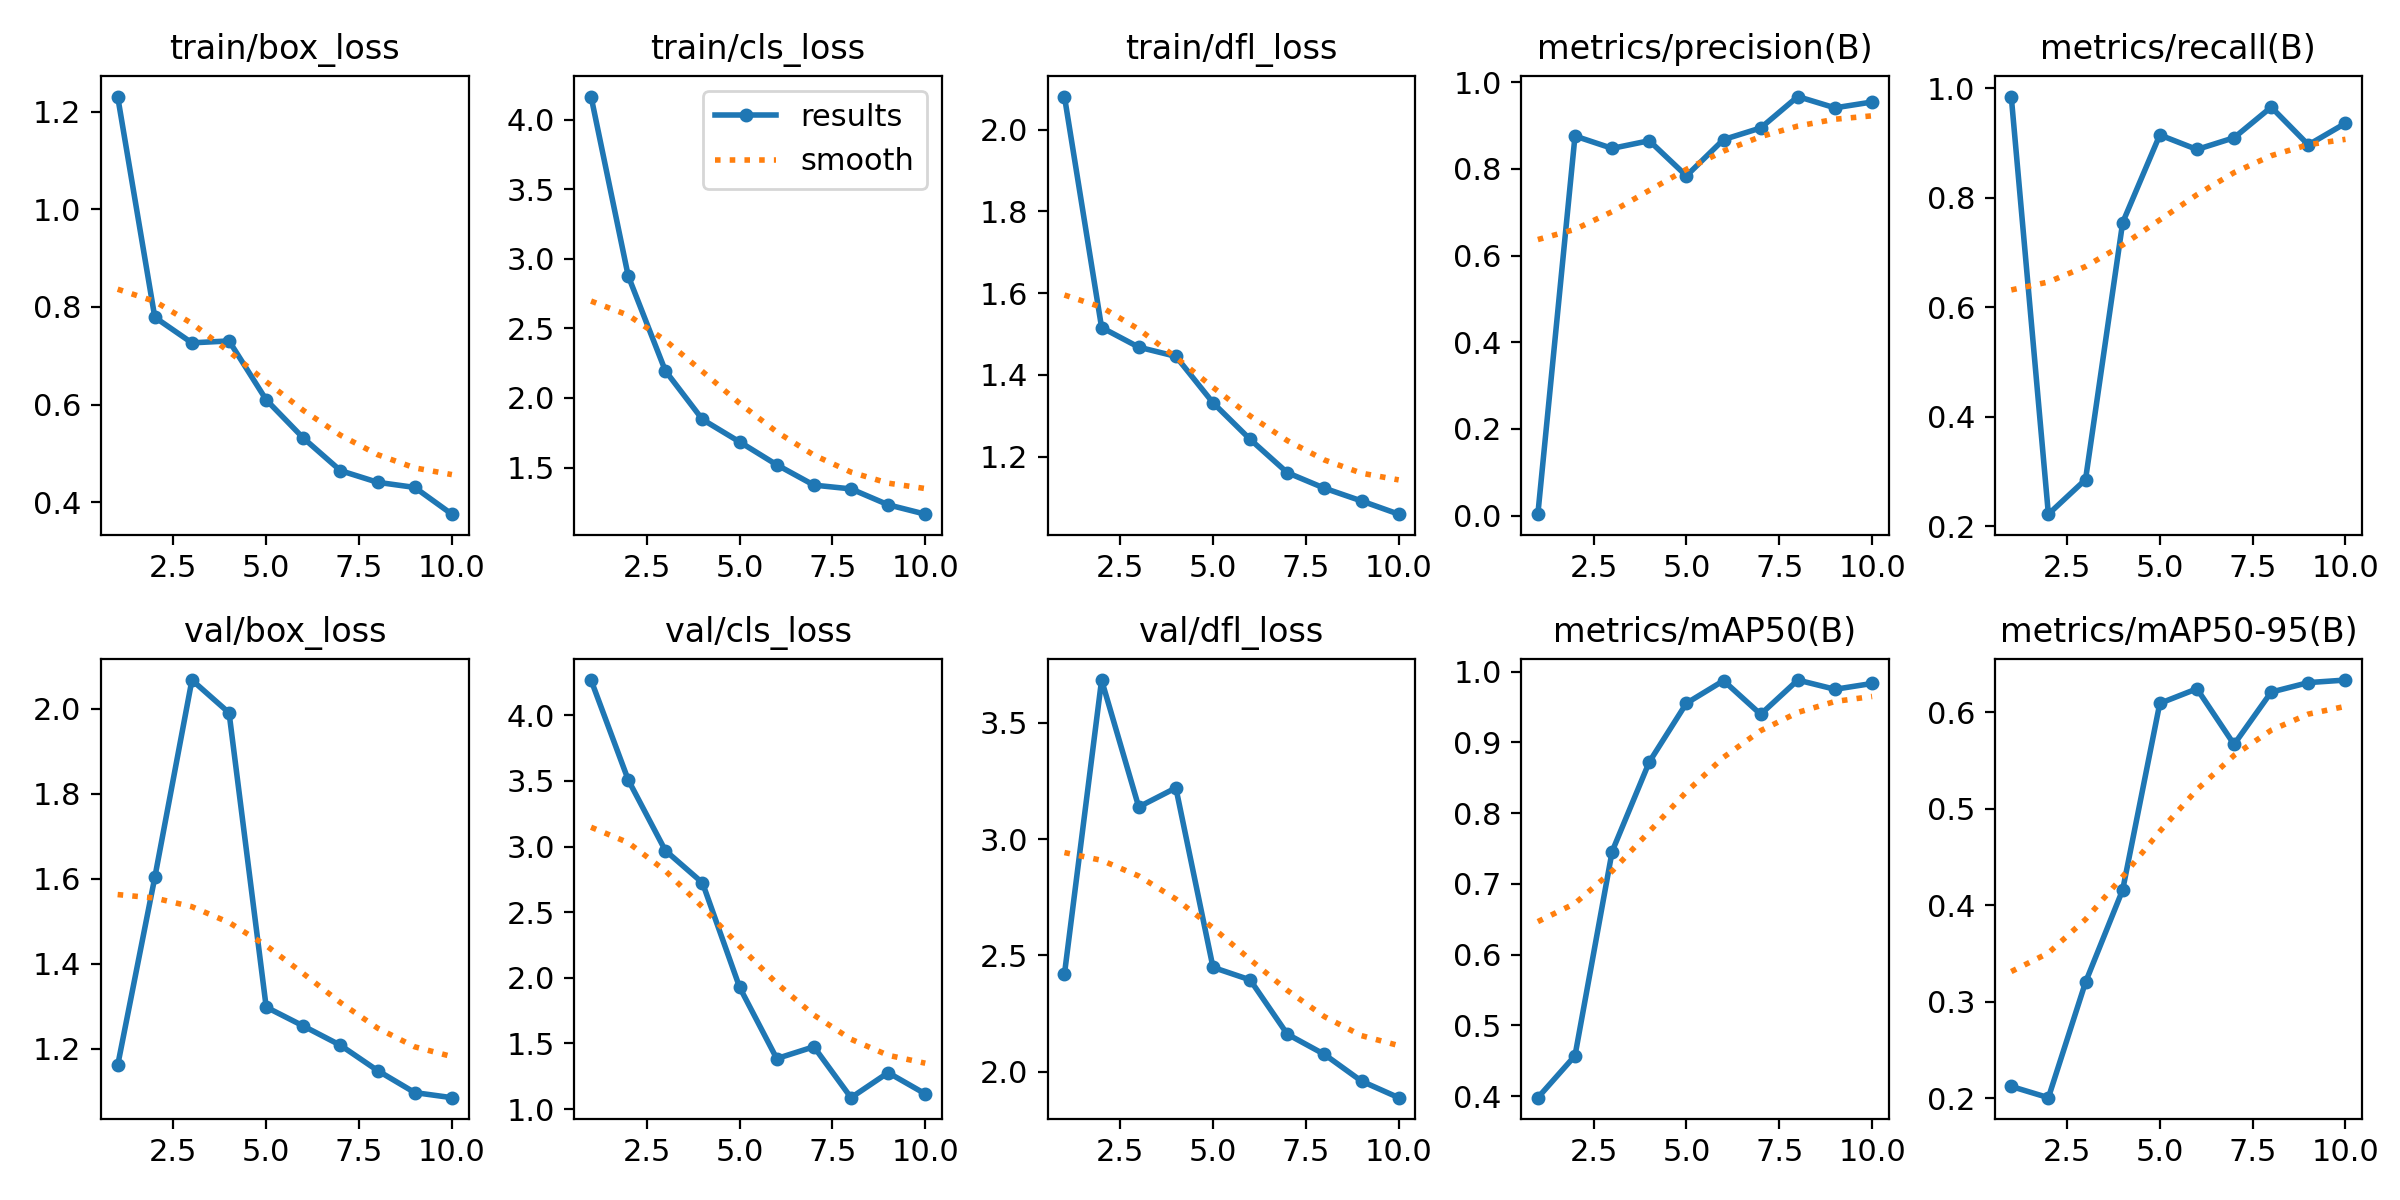

In [18]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

d:\datasci\projectFiles\hoa_4_2


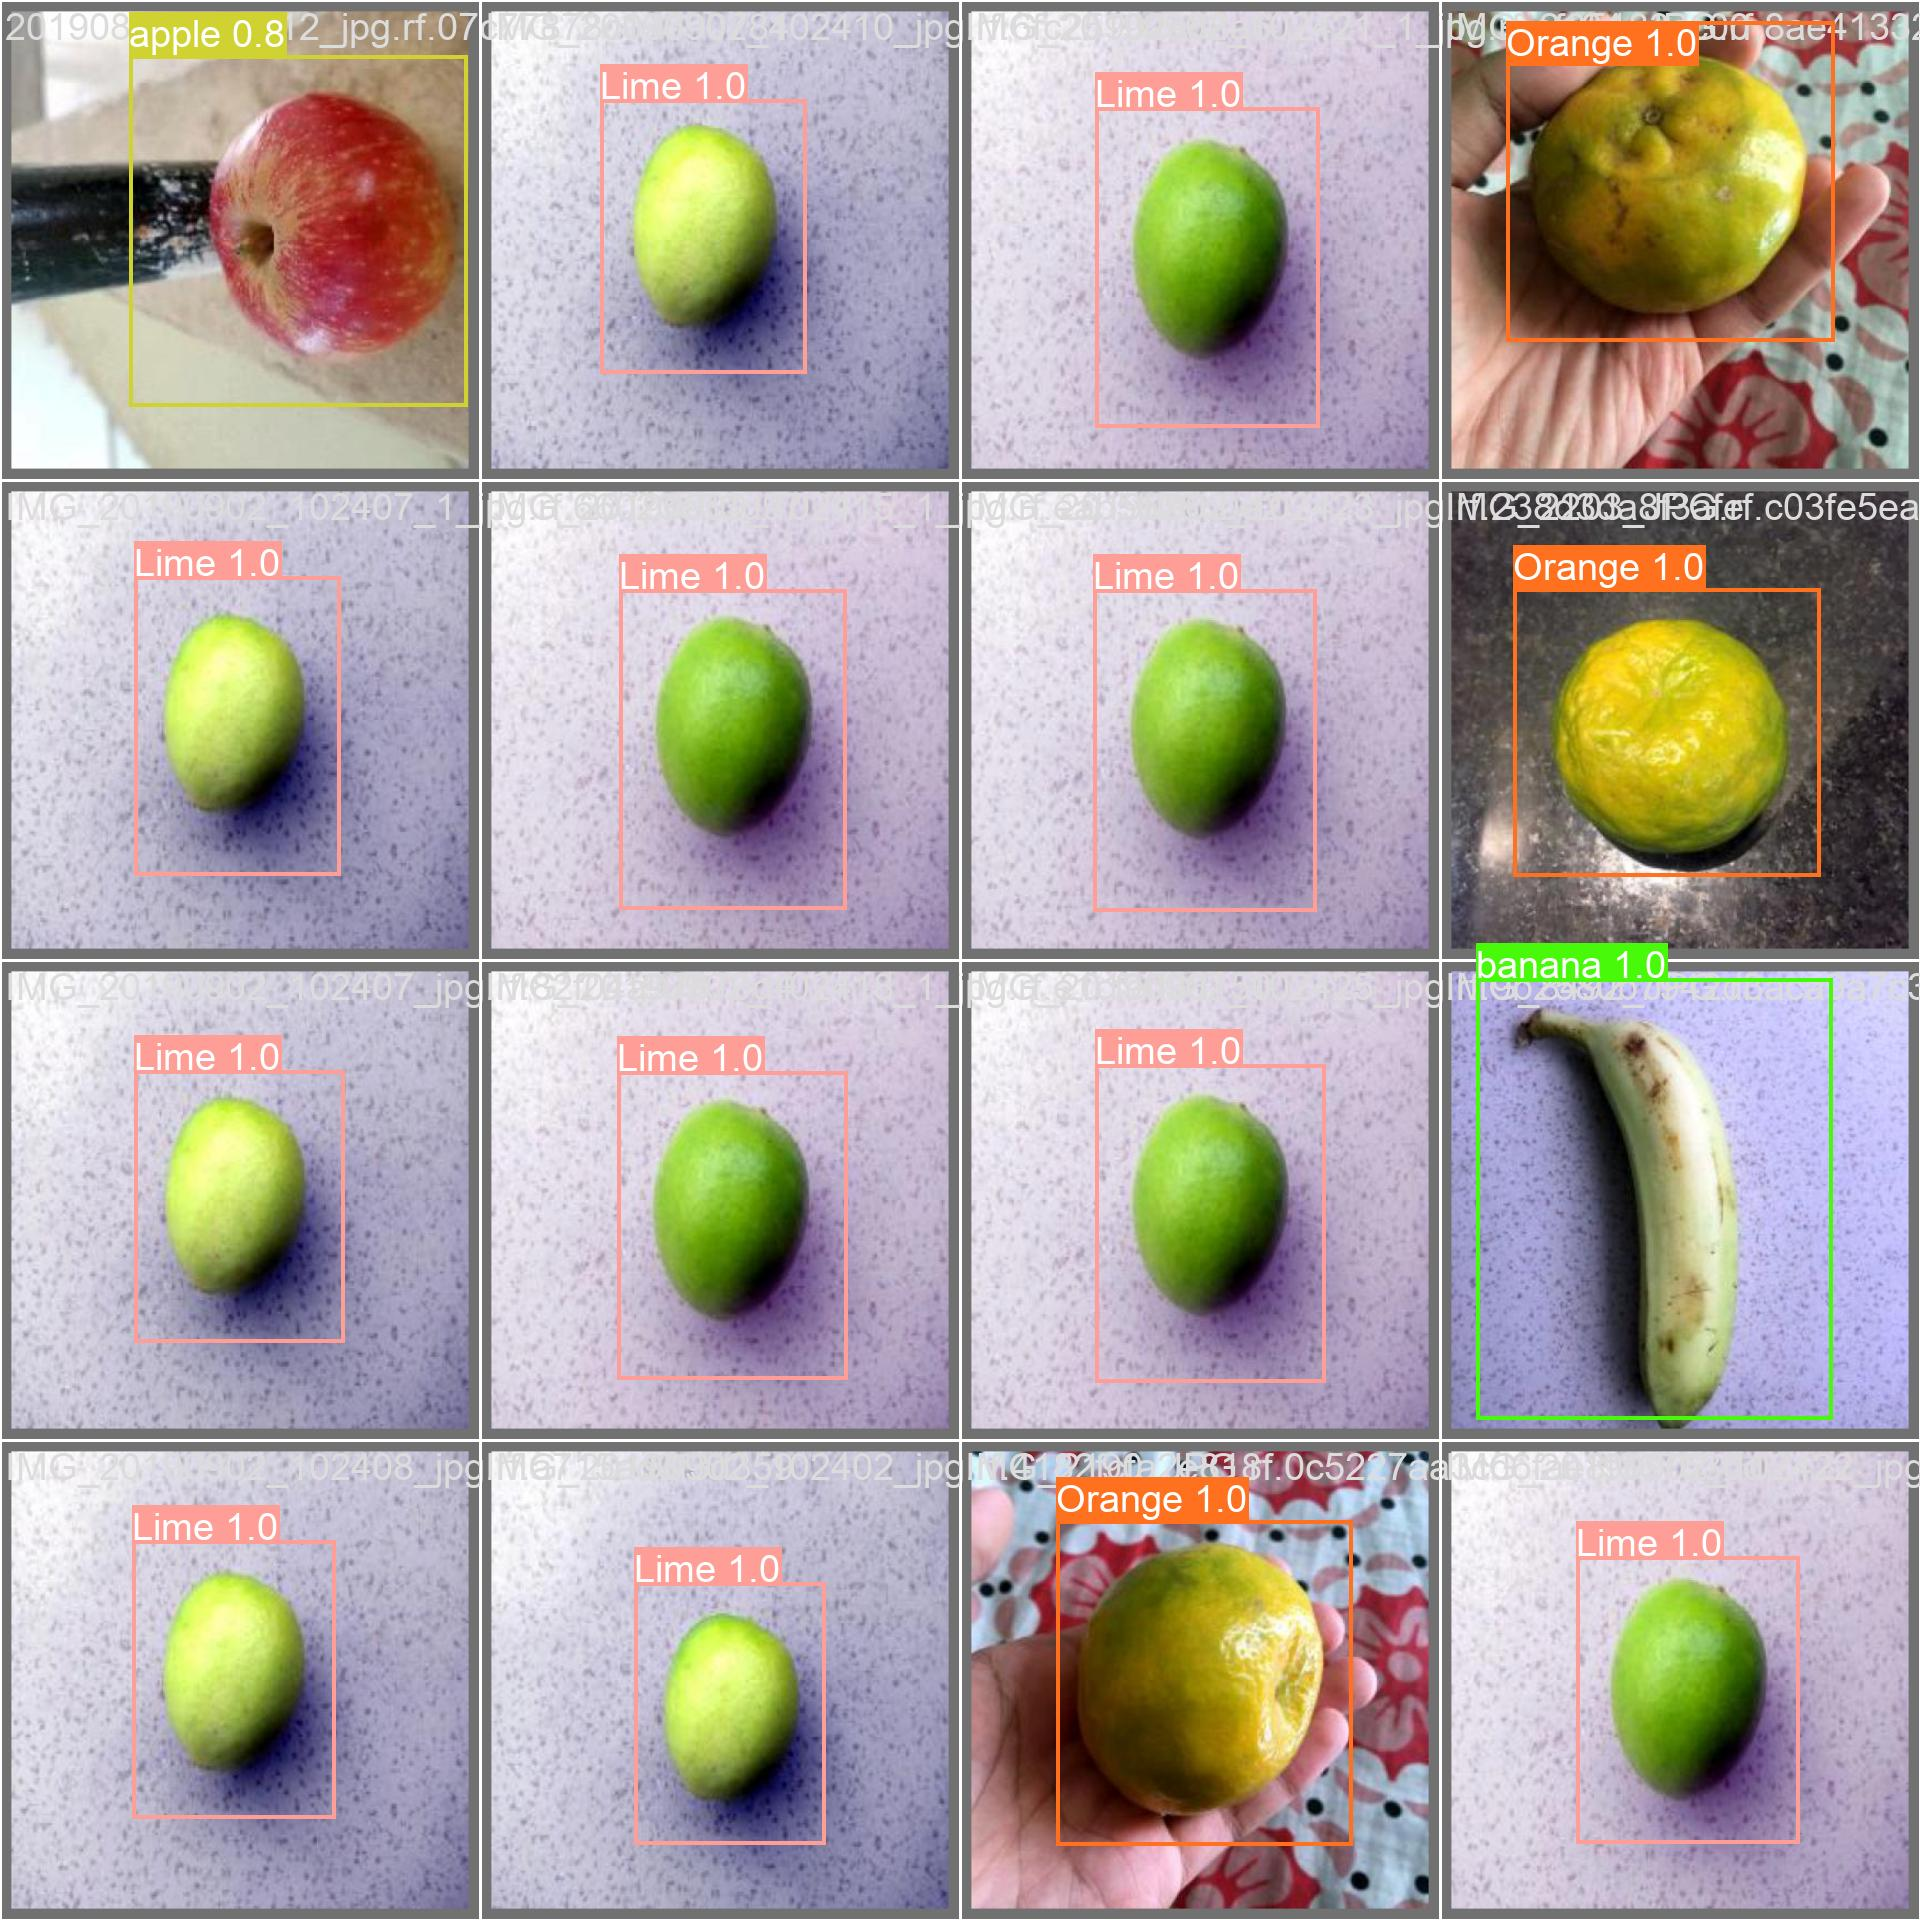

In [19]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

In [20]:
metrics = model.val() 

Ultralytics YOLOv8.1.45  Python-3.12.2 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)
YOLOv8n summary (fused): 168 layers, 3006818 parameters, 0 gradients


val: Scanning D:\datasci\projectFiles\hoa_4_2\datasets\fruitclass.-1\valid\labels.cache... 35 images, 0 backgrounds, 0 corrupt: 100%|██████████| 35/35 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:05<00:00,  1.93s/it]


                   all         35         35      0.955      0.936      0.987      0.634
                 Guava         35          6      0.976          1      0.995      0.694
                  Lime         35         11      0.982          1      0.995      0.708
                Orange         35          3      0.941          1      0.995      0.664
           Pomegranate         35          6      0.849          1      0.995      0.679
                 apple         35          2      0.979          1      0.995      0.451
                banana         35          7          1      0.616      0.944       0.61
Speed: 1.9ms preprocess, 20.0ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs\detect\train22


For input image names into the above, consider trying the following:

- `00a7a49c47d51fd16a4cbb17e2d2cf86.jpg` # white-king works! + knight
- `015d0d7ff365f0b7492ff079c8c7d56c.jpg` # black-queen mixes up
- `176b28b5c417f39a9e5d37545fca5b4c.jpg` # finds only five
- `4673f994f60a2ea7afdddc1b752947c0.jpg` # white-rook (thinks king)
- `5ca7f0cb1c500554e65ad031190f8e9f.jpg` # white-pawn (missed white-king)
- `fbf15139f38a46e02b5f4061c0c9b08f.jpg` # black-king success!

You can view these images in your Colab notebook by clicking on the image name in the expanded left-hand panel (Files → keras-yolo3 → IMG_NAME ).

## Move currently trained model to GDrive

Optionally, you may want to save the new weights that your model trained so that the next time you run this notebook, you can either skip training and use these weights for inference or begin training where you left off with this weights file.

Following the below will link your Colab notebook to your Google Drive, and save the weights (named as the current time you saved them to enforce a unique file name) in your Drive folder.

*the weights can be found at "runs\detect\train2\weights"*

In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# create a copy of the weights file with a datetime
# and move that file to your own Drive
%cp ./logs/000/trained_weights_stage_1.h5 ./logs/000/trained_weights_stage_1_$(date +%F-%H:%M).h5
%mv ./logs/000/trained_weights_stage_1_$(date +%F-%H:%M).h5 /content/drive/My\ Drive/

# Conclusion

Using RoboFlow and YOLO is a create tool/workflow in creating object detection models that is customed in your own dataset. RoboFlow help you automate the process of labeling the data and which the labeled data can be formatted for YOLO and be exported via url. In YOLO we used darknet we loaded the model and weights wherein we can use it to train it in our own dataset.

# Github Link

https://github.com/Abyza/CPE313/tree/main/HOA_4_2_Object_Detection_on_Custom_Dataset